In [3]:
import pandas as pd

# Define the file path
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'

# Load the Excel file into a DataFrame
data_df = pd.read_excel(file_path)

# Display the first few rows to confirm the structure
print(data_df.head())


          CASE_NUMBER CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
0  I-200-14073-248840      denied          3/14/2014     3/21/2014   
1       A-15061-55212      denied          3/19/2015     3/19/2015   
2  I-200-13256-001092      denied          9/13/2013     9/23/2013   
3  I-200-14087-353657      denied          3/28/2014      4/7/2014   
4  I-203-14259-128844      denied          9/16/2014     9/23/2014   

                                       EMPLOYER_NAME  \
0                ADVANCED TECHNOLOGY GROUP USA, INC.   
1                     SAN FRANCISCO STATE UNIVERSITY   
2                                    CAROUSEL SCHOOL   
3  HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...   
4                        SIGNAL SCIENCES CORPORATION   

   PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
0                  6217100.0                           year   
1                  5067600.0                           year   
2                  4947000.0                         

In [4]:
# Inspect the unique state names to determine the naming convention
unique_states = data_df['WORK_STATE'].unique()
print(unique_states)


['Illinois' 'California' 'Texas' 'Oregon' 'New Jersey' 'New York'
 'Connecticut' 'Washington' 'Maryland' 'North Carolina'
 'District of Columbia' 'South Carolina' 'Rhode Island' 'Colorado'
 'Michigan' 'Missouri' 'Minnesota' 'Wyoming' 'Louisiana' 'Pennsylvania'
 'Tennessee' 'Idaho' 'Massachusetts' 'Nebraska' 'Georgia' 'Ohio' 'Florida'
 'Indiana' 'Arizona' 'Kentucky' 'Iowa' 'Wisconsin' 'Alabama' 'Arkansas'
 'Virginia' 'New Mexico' 'West Virginia' 'Oklahoma' 'Utah' 'Nevada'
 'Mississippi' 'New Hampshire' 'Delaware' 'Kansas' 'Alaska' 'Hawaii'
 'Vermont' 'North Dakota' 'Maine' 'Montana' 'Virgin Islands'
 'South Dakota' 'Guam' 'Puerto Rico' 'Palau' 'Guamam'
 'Northern Mariana Islands']


In [5]:
# Display unique job titles in the dataset
unique_job_titles = data_df['JOB_TITLE'].unique()
print(unique_job_titles)


['SOFTWARE ENGINEER' 'Assistant Professor of Marketing'
 'SPECIAL EDUCATION TEACHER' ...
 'BILINGUAL SPECIAL EDUCAITON TEACHER ASSISTANT'
 'BILINGUAL SPECIAL EDUCATIN TEACHER ASSISTANT'
 'BILINGUAL SPECIAL EDUCATION TEACHER ASSISTANT']


In [11]:

import pandas as pd

# Define the file path
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'

# Load the Excel file into a DataFrame
data_df = pd.read_excel(file_path)

# Filter for data-related job titles based on keywords in the JOB_TITLE column
keywords = ['data scientist', 'data analyst', 'data engineer', 'big data']
data_related_roles = df[df['JOB_TITLE'].str.contains('|'.join(keywords), case=False, na=False)]

# Display a summary of filtered data to verify
data_related_roles[['JOB_TITLE', 'WORK_STATE', 'PAID_WAGE_PER_YEAR', 'EMPLOYER_NAME']].head()


NameError: name 'df' is not defined

In [13]:
# Display all unique job titles
unique_job_titles = data_df['JOB_TITLE'].unique()
print(unique_job_titles)


['SOFTWARE ENGINEER' 'Assistant Professor of Marketing'
 'SPECIAL EDUCATION TEACHER' ...
 'BILINGUAL SPECIAL EDUCAITON TEACHER ASSISTANT'
 'BILINGUAL SPECIAL EDUCATIN TEACHER ASSISTANT'
 'BILINGUAL SPECIAL EDUCATION TEACHER ASSISTANT']


In [15]:
# Display all unique job titles in a DataFrame for better viewing
unique_job_titles_df = pd.DataFrame(unique_job_titles, columns=['Job Titles'])
print(unique_job_titles_df)


                                          Job Titles
0                                  SOFTWARE ENGINEER
1                   Assistant Professor of Marketing
2                          SPECIAL EDUCATION TEACHER
3                                    SCIENCE TEACHER
4                           SENIOR SOFTWARE ENGINEER
...                                              ...
12584                 ASSISTANT PROFESSOR IN ITALIAN
12585                PRE-K MONTESSORI SCHOOL TEACHER
12586  BILINGUAL SPECIAL EDUCAITON TEACHER ASSISTANT
12587   BILINGUAL SPECIAL EDUCATIN TEACHER ASSISTANT
12588  BILINGUAL SPECIAL EDUCATION TEACHER ASSISTANT

[12589 rows x 1 columns]


In [17]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'
data_df = pd.read_excel(file_path)

# Define the states you are willing to move to
states_willing_to_move = ['California', 'Texas', 'New York', 'Washington', 'Oregon']

# Filter the data for only those states
filtered_states = data_df[data_df['WORK_STATE'].isin(states_willing_to_move)]

# Ensure the column names are consistent
if 'PAID_WAGE_PER_YEAR' in filtered_states.columns and 'WORK_STATE' in filtered_states.columns:
    # Calculate the average paid wage for all job titles in the selected states
    state_avg_salary = (
        filtered_states.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR']
        .mean()
        .sort_values(ascending=False)
    )

    # Convert to a DataFrame for better viewing
    state_avg_salary_df = state_avg_salary.reset_index()
    state_avg_salary_df.columns = ['State', 'Average Paid Wage (USD)']

    # Display the results
    print(state_avg_salary_df)
else:
    print("Required columns ('PAID_WAGE_PER_YEAR', 'WORK_STATE') are missing from the dataset.")


        State  Average Paid Wage (USD)
0  California            103571.109230
1  Washington            102176.679145
2    New York             91601.758915
3      Oregon             81530.546156
4       Texas             72765.870529


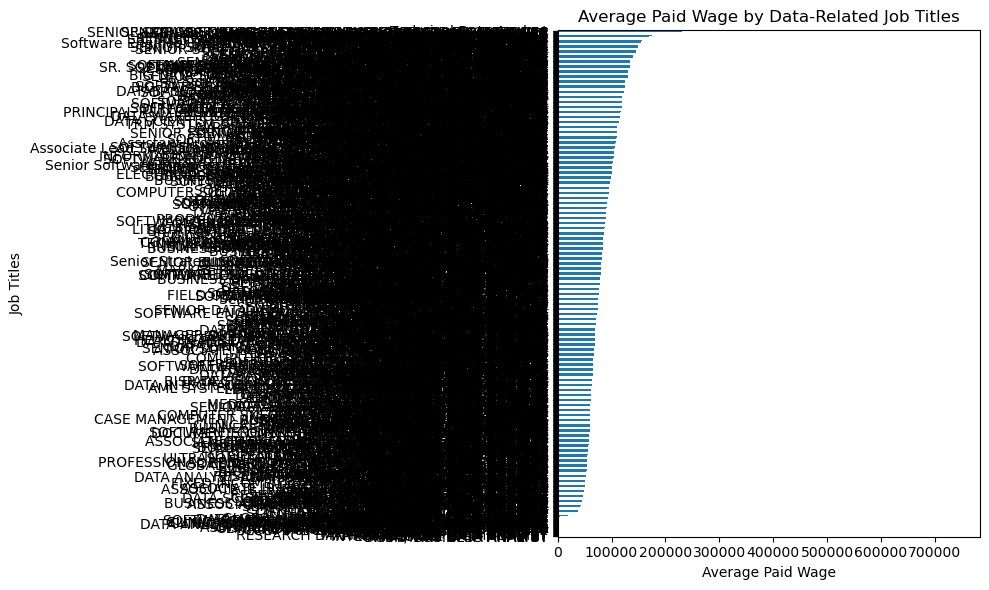

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'
data_df = pd.read_excel(file_path)

# Filter for data-related job titles
data_related_jobs = data_df[data_df['JOB_TITLE'].str.contains('data', case=False, na=False)]

# Group data by job titles and calculate the average paid wage
average_paid_wage = data_related_jobs.groupby('JOB_TITLE')['PAID_WAGE_SUBMITTED'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_paid_wage.plot(kind='barh')
plt.title('Average Paid Wage by Data-Related Job Titles')
plt.xlabel('Average Paid Wage')
plt.ylabel('Job Titles')
plt.tight_layout()

# Display the chart
plt.show()


C:\Users\raoul\AppData\Local\Temp\ipykernel_12148\876684256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_related_jobs['WAGE_DIFFERENCE'] = data_related_jobs['PAID_WAGE_SUBMITTED'] - data_related_jobs['PREVAILING_WAGE_SUBMITTED']


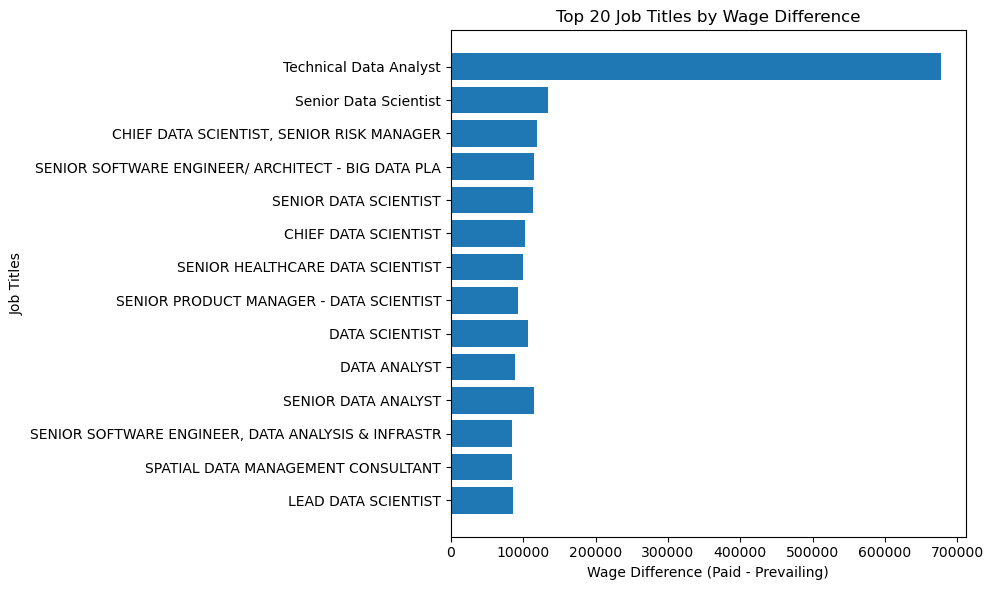

In [3]:
# Calculate wage differences
data_related_jobs['WAGE_DIFFERENCE'] = data_related_jobs['PAID_WAGE_SUBMITTED'] - data_related_jobs['PREVAILING_WAGE_SUBMITTED']

# Get the top 20 job titles by wage difference
top_20_wage_diff = data_related_jobs.nlargest(20, 'WAGE_DIFFERENCE')

# Sort by wage difference for a cleaner plot
top_20_wage_diff = top_20_wage_diff.sort_values(by='WAGE_DIFFERENCE')

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_20_wage_diff['JOB_TITLE'], top_20_wage_diff['WAGE_DIFFERENCE'])
plt.title('Top 20 Job Titles by Wage Difference')
plt.xlabel('Wage Difference (Paid - Prevailing)')
plt.ylabel('Job Titles')
plt.tight_layout()

# Display the chart
plt.show()


In [7]:
# List of job sub-types to filter
job_sub_types = [
    "Technical Data Analyst",
    "Senior Data Scientist",
    "Chief Data Scientist, Senior Risk Manager",
    "Senior Software Engineer/ Architect - Big Data Pla",
    "Senior Data Scientist",
    "Chief Data Scientist",
    "Senior Healthcare Data Scientist",
    "Senior Product Manager - Data Scientist",
    "Data Scientist",
    "Data Analyst",
    "Senior Data Analyst",
    "Senior Software Engineer, Data Analysis & Infrastr",
    "Spatial Data Management Consultant",
    "Lead Data Scientist"
]

# Filter dataset for these job sub-types
filtered_jobs = data_related_jobs[data_related_jobs['JOB_TITLE'].isin(job_sub_types)]

# Find the companies with the highest salaries for these sub-types
highest_salaries = filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['PAID_WAGE_SUBMITTED'].max().reset_index()

# Sort by salary in descending order
highest_salaries = highest_salaries.sort_values(by='PAID_WAGE_SUBMITTED', ascending=False)

# Display the top results
from IPython.display import display

# Display the DataFrame interactively
display(highest_salaries)

,EMPLOYER_NAME,JOB_TITLE,PAID_WAGE_SUBMITTED
37,INTUIT,Technical Data Analyst,746323.0
44,NETFLIX,Senior Data Scientist,220000.0
55,"STAPLES, INC.",Senior Data Scientist,165000.0
39,LINKEDIN CORPORATION,Senior Data Scientist,150000.0
49,QUIXEY,Data Analyst,150000.0
...,...,...,...
33,"HARVEST TRADING GROUP,INC.",Data Analyst,60000.0
47,"NEW BREED, INC.",Senior Data Analyst,60000.0
6,BLOOMBERG L.P.,Data Analyst,59000.0
32,"FOXCONN EMS, INC.",Data Analyst,56680.0


In [7]:
# List of job sub-types to filter
job_sub_types = [
    "Technical Data Analyst",
    "Senior Data Scientist",
    "Chief Data Scientist, Senior Risk Manager",
    "Senior Software Engineer/ Architect - Big Data Pla",
    "Senior Data Scientist",
    "Chief Data Scientist",
    "Senior Healthcare Data Scientist",
    "Senior Product Manager - Data Scientist",
    "Data Scientist",
    "Data Analyst",
    "Senior Data Analyst",
    "Senior Software Engineer, Data Analysis & Infrastr",
    "Spatial Data Management Consultant",
    "Lead Data Scientist"
]

# Filter dataset for these job sub-types
filtered_jobs = data_related_jobs[data_related_jobs['JOB_TITLE'].isin(job_sub_types)]

# Find the companies with the highest salaries for these sub-types
highest_salaries = filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['PAID_WAGE_SUBMITTED'].max().reset_index()

# Sort by salary in descending order
highest_salaries = highest_salaries.sort_values(by='PAID_WAGE_SUBMITTED', ascending=False)

# Display the top results
from IPython.display import display

# Display the DataFrame interactively
display(highest_salaries)

,EMPLOYER_NAME,JOB_TITLE,PAID_WAGE_SUBMITTED
37,INTUIT,Technical Data Analyst,746323.0
44,NETFLIX,Senior Data Scientist,220000.0
55,"STAPLES, INC.",Senior Data Scientist,165000.0
39,LINKEDIN CORPORATION,Senior Data Scientist,150000.0
49,QUIXEY,Data Analyst,150000.0
...,...,...,...
33,"HARVEST TRADING GROUP,INC.",Data Analyst,60000.0
47,"NEW BREED, INC.",Senior Data Analyst,60000.0
6,BLOOMBERG L.P.,Data Analyst,59000.0
32,"FOXCONN EMS, INC.",Data Analyst,56680.0


In [9]:
# List of job sub-types to filter
job_sub_types = [
    "Technical Data Analyst",
    "Senior Data Scientist",
    "Chief Data Scientist, Senior Risk Manager",
    "Senior Software Engineer/ Architect - Big Data Pla",
    "Senior Data Scientist",
    "Chief Data Scientist",
    "Senior Healthcare Data Scientist",
    "Senior Product Manager - Data Scientist",
    "Data Scientist",
    "Data Analyst",
    "Senior Data Analyst",
    "Senior Software Engineer, Data Analysis & Infrastr",
    "Spatial Data Management Consultant",
    "Lead Data Scientist"
]

# Filter dataset for these job sub-types
filtered_jobs = data_related_jobs[data_related_jobs['JOB_TITLE'].isin(job_sub_types)]

# Find the companies with the highest salaries for these sub-types
highest_salaries = filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['PAID_WAGE_SUBMITTED'].max().reset_index()

# Sort by salary in descending order
highest_salaries = highest_salaries.sort_values(by='PAID_WAGE_SUBMITTED', ascending=False)

# Display the top results
from IPython.display import display

# Display the DataFrame interactively
display(highest_salaries)

,EMPLOYER_NAME,JOB_TITLE,PAID_WAGE_SUBMITTED
37,INTUIT,Technical Data Analyst,746323.0
44,NETFLIX,Senior Data Scientist,220000.0
55,"STAPLES, INC.",Senior Data Scientist,165000.0
39,LINKEDIN CORPORATION,Senior Data Scientist,150000.0
49,QUIXEY,Data Analyst,150000.0
...,...,...,...
33,"HARVEST TRADING GROUP,INC.",Data Analyst,60000.0
47,"NEW BREED, INC.",Senior Data Analyst,60000.0
6,BLOOMBERG L.P.,Data Analyst,59000.0
32,"FOXCONN EMS, INC.",Data Analyst,56680.0


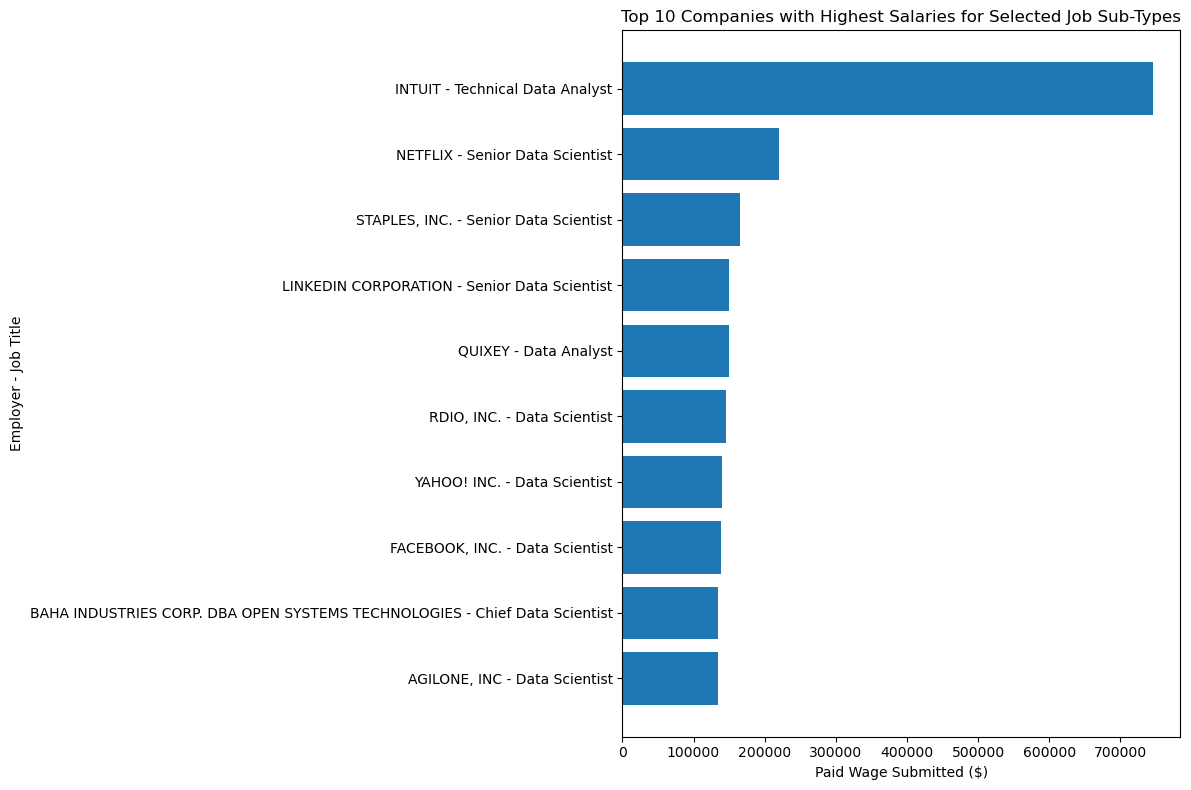

In [11]:
import matplotlib.pyplot as plt

# Select the top 10 companies with the highest salaries for better readability
top_10_highest_salaries = highest_salaries.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_highest_salaries['EMPLOYER_NAME'] + ' - ' + top_10_highest_salaries['JOB_TITLE'],
    top_10_highest_salaries['PAID_WAGE_SUBMITTED']
)
plt.xlabel('Paid Wage Submitted ($)')
plt.ylabel('Employer - Job Title')
plt.title('Top 10 Companies with Highest Salaries for Selected Job Sub-Types')
plt.tight_layout()

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


C:\Users\raoul\AppData\Local\Temp\ipykernel_12148\3190859299.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)
C:\Users\raoul\AppData\Local\Temp\ipykernel_12148\3190859299.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']


,EMPLOYER_NAME,JOB_TITLE,REAL_SALARY
0,360I LLC,Data Scientist,NaN
1,"AGILONE, INC",Data Scientist,NaN
2,"AIRSAGE, INC",Data Scientist,NaN
3,APPLE INC.,Data Analyst,NaN
4,BAHA INDUSTRIES CORP. DBA OPEN SYSTEMS TECHNOL...,Chief Data Scientist,NaN
5,"BIRCHBOX, INC.",Senior Data Scientist,NaN
6,BLOOMBERG L.P.,Data Analyst,NaN
7,"BRAVESOFTTECH, INC.",Senior Data Scientist,NaN
8,"CAMSTAR SYSTEMS, INC.",Data Analyst,NaN
9,CAPITAL ONE SERVICES II LLC,Senior Data Analyst,NaN


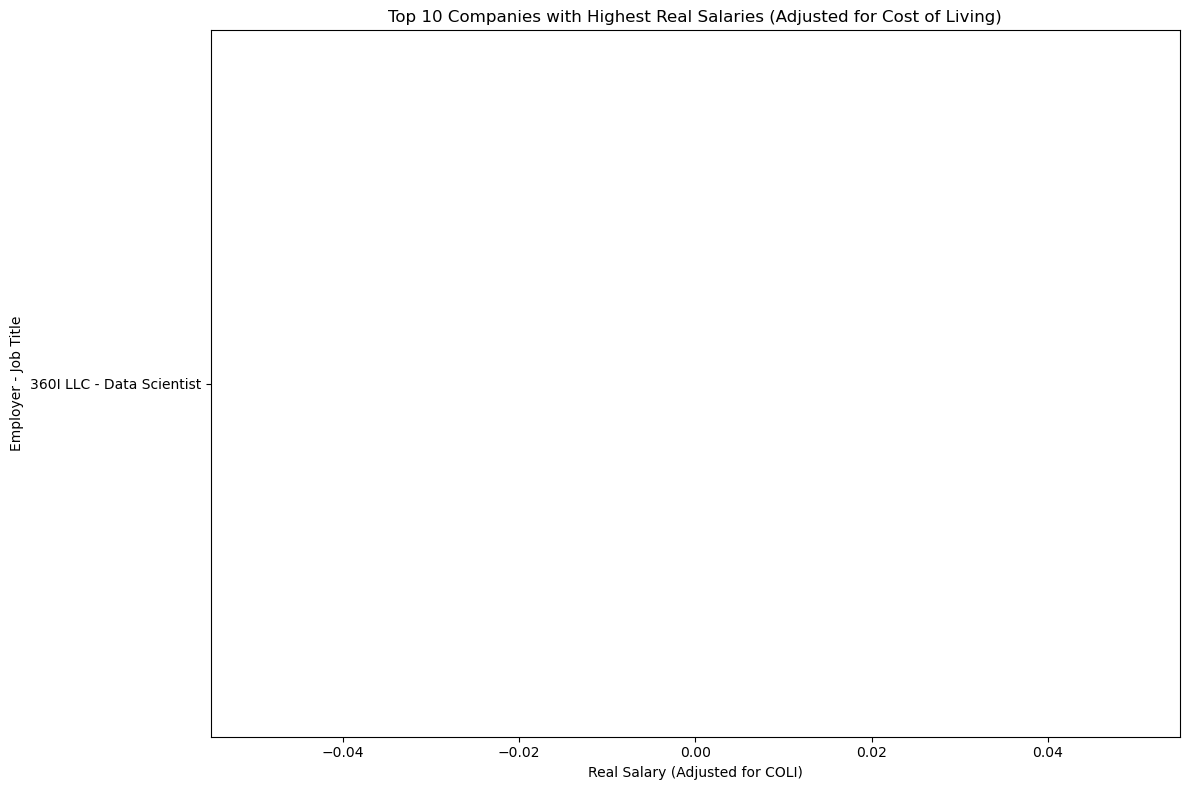

In [13]:
# Sample COLI dataset: Replace this with your actual COLI data
cost_of_living_data = {
    'CALIFORNIA': 1.5,  # Example: California has 50% higher COLI than average
    'MINNESOTA': 1.2,
    'TEXAS': 1.1,
    'NEW YORK': 1.8,
    'OREGON': 1.3
}

# Map the cost of living index to the dataset
filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)

# Calculate real salary adjusted for cost of living
filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Find companies with the highest real salaries
highest_real_salaries = filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY'].max().reset_index()

# Sort by real salary in descending order
highest_real_salaries = highest_real_salaries.sort_values(by='REAL_SALARY', ascending=False)

# Display the results
from IPython.display import display
display(highest_real_salaries.head(10))

# Plotting the top 10 companies with the highest real salaries
import matplotlib.pyplot as plt

# Select the top 10 companies with the highest real salaries
top_10_real_salaries = highest_real_salaries.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_real_salaries['EMPLOYER_NAME'] + ' - ' + top_10_real_salaries['JOB_TITLE'],
    top_10_real_salaries['REAL_SALARY']
)
plt.xlabel('Real Salary (Adjusted for COLI)')
plt.ylabel('Employer - Job Title')
plt.title('Top 10 Companies with Highest Real Salaries (Adjusted for Cost of Living)')
plt.tight_layout()

# Display the plot
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()


C:\Users\raoul\AppData\Local\Temp\ipykernel_12148\946544475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)


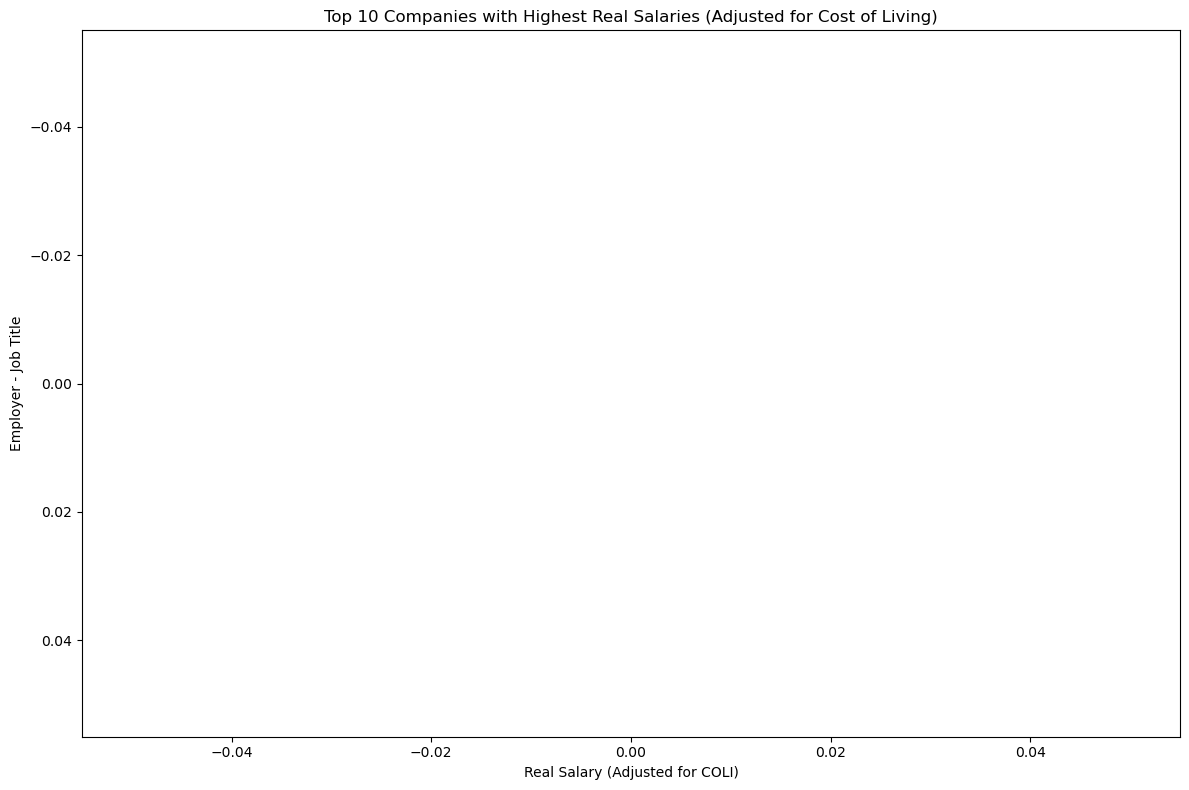

In [15]:
# Handle missing COLI values by dropping rows without a valid COLI
filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)
filtered_jobs = filtered_jobs.dropna(subset=['COLI', 'PAID_WAGE_SUBMITTED'])

# Calculate real salary adjusted for cost of living
filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Find companies with the highest real salaries
highest_real_salaries = filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY'].max().reset_index()

# Sort by real salary in descending order
highest_real_salaries = highest_real_salaries.sort_values(by='REAL_SALARY', ascending=False)

# Plotting the top 10 companies with the highest real salaries
import matplotlib.pyplot as plt

# Select the top 10 companies with the highest real salaries
top_10_real_salaries = highest_real_salaries.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_real_salaries['EMPLOYER_NAME'] + ' - ' + top_10_real_salaries['JOB_TITLE'],
    top_10_real_salaries['REAL_SALARY']
)
plt.xlabel('Real Salary (Adjusted for COLI)')
plt.ylabel('Employer - Job Title')
plt.title('Top 10 Companies with Highest Real Salaries (Adjusted for Cost of Living)')
plt.tight_layout()

# Invert y-axis for readability
plt.gca().invert_yaxis()
plt.show()


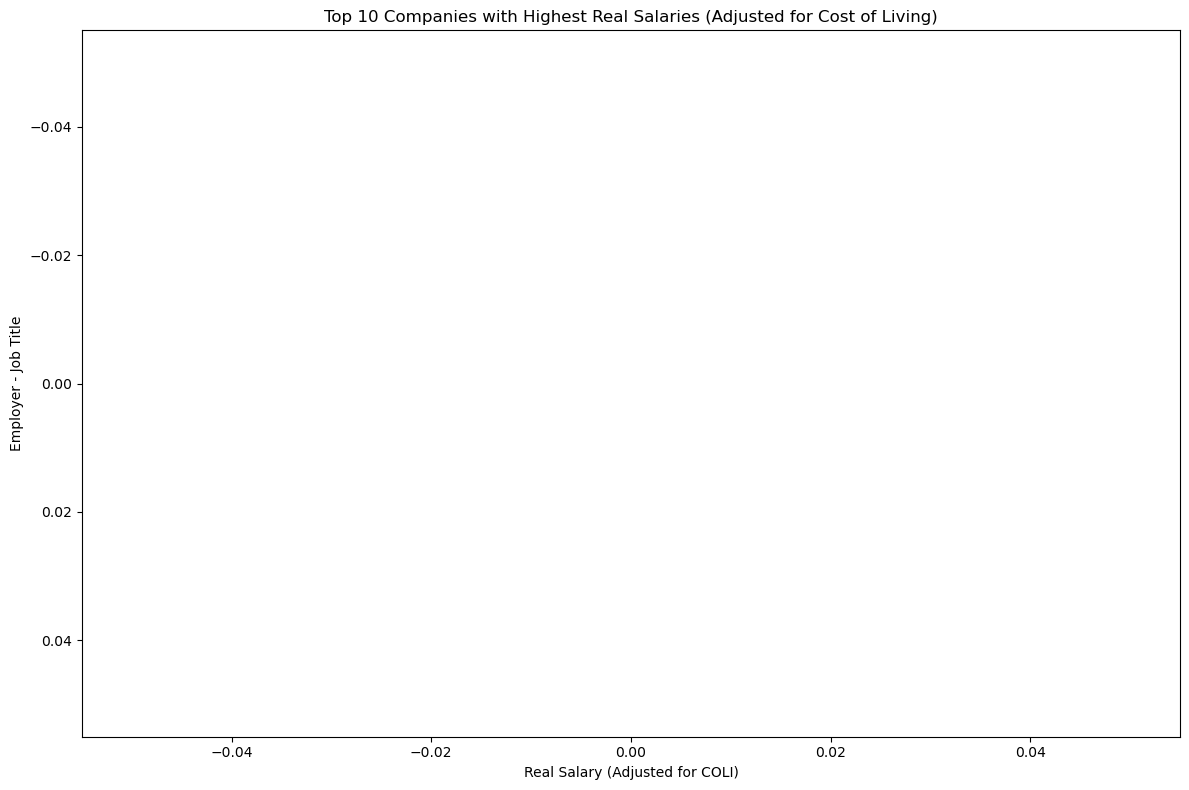

In [17]:
# Handle missing COLI values by dropping rows without a valid COLI
filtered_jobs = filtered_jobs.copy()  # Avoid SettingWithCopyWarning by creating a new DataFrame
filtered_jobs.loc[:, 'COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)
filtered_jobs = filtered_jobs.dropna(subset=['COLI', 'PAID_WAGE_SUBMITTED'])

# Calculate real salary adjusted for cost of living
filtered_jobs.loc[:, 'REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Find companies with the highest real salaries
highest_real_salaries = filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY'].max().reset_index()

# Sort by real salary in descending order
highest_real_salaries = highest_real_salaries.sort_values(by='REAL_SALARY', ascending=False)

# Plotting the top 10 companies with the highest real salaries
import matplotlib.pyplot as plt

# Select the top 10 companies with the highest real salaries
top_10_real_salaries = highest_real_salaries.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_real_salaries['EMPLOYER_NAME'] + ' - ' + top_10_real_salaries['JOB_TITLE'],
    top_10_real_salaries['REAL_SALARY']
)
plt.xlabel('Real Salary (Adjusted for COLI)')
plt.ylabel('Employer - Job Title')
plt.title('Top 10 Companies with Highest Real Salaries (Adjusted for Cost of Living)')
plt.tight_layout()

# Invert y-axis for readability
plt.gca().invert_yaxis()
plt.show()


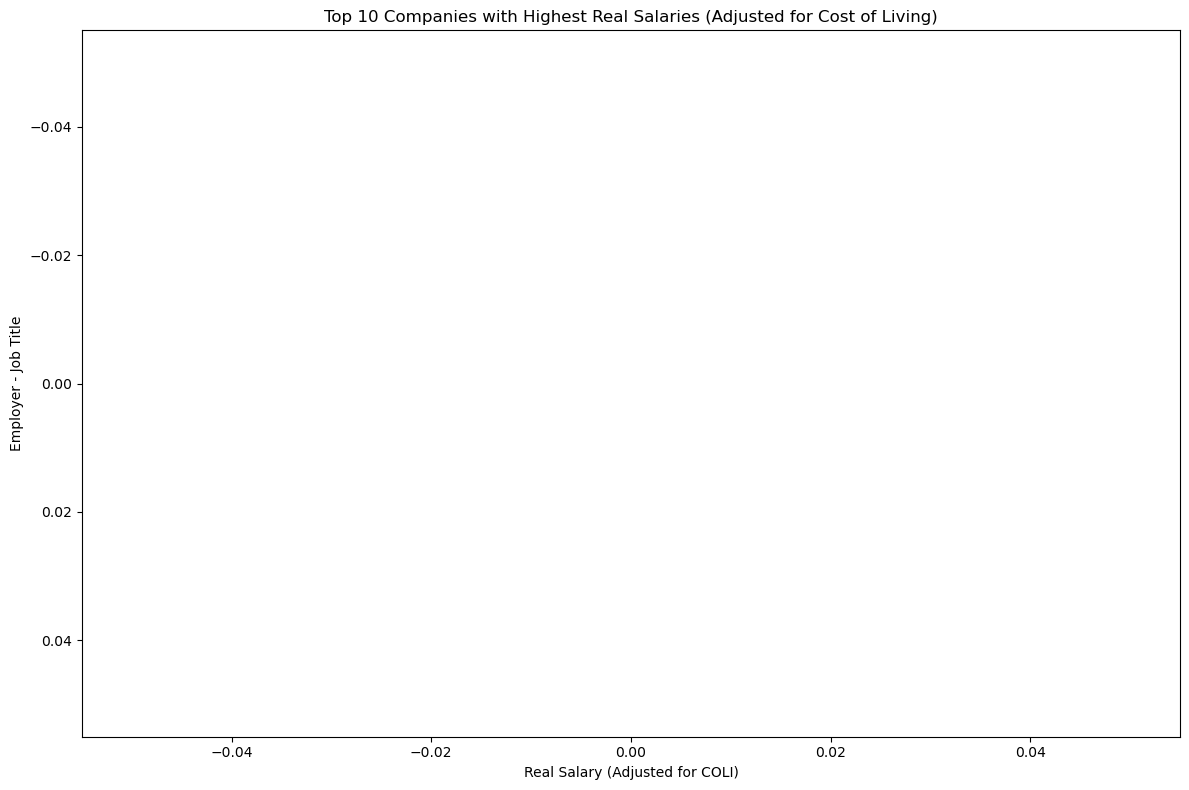

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'
data_df = pd.read_excel(file_path)

# Sample COLI dataset: Replace with actual COLI data if available
cost_of_living_data = {
    'CALIFORNIA': 1.5,  # Example: California has 50% higher COLI than average
    'MINNESOTA': 1.2,
    'TEXAS': 1.1,
    'NEW YORK': 1.8,
    'OREGON': 1.3
}

# Filter for data-related job titles
job_sub_types = [
    "Technical Data Analyst",
    "Senior Data Scientist",
    "Chief Data Scientist, Senior Risk Manager",
    "Senior Software Engineer/ Architect - Big Data Pla",
    "Senior Data Scientist",
    "Chief Data Scientist",
    "Senior Healthcare Data Scientist",
    "Senior Product Manager - Data Scientist",
    "Data Scientist",
    "Data Analyst",
    "Senior Data Analyst",
    "Senior Software Engineer, Data Analysis & Infrastr",
    "Spatial Data Management Consultant",
    "Lead Data Scientist"
]

filtered_jobs = data_df[data_df['JOB_TITLE'].isin(job_sub_types)].copy()

# Map COLI to the filtered jobs
filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)

# Drop rows with missing COLI or salaries
filtered_jobs = filtered_jobs.dropna(subset=['COLI', 'PAID_WAGE_SUBMITTED'])

# Calculate real salary adjusted for cost of living
filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Find companies with the highest real salaries
highest_real_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY']
    .max()
    .reset_index()
)

# Sort by real salary in descending order
highest_real_salaries = highest_real_salaries.sort_values(by='REAL_SALARY', ascending=False)

# Select the top 10 companies with the highest real salaries
top_10_real_salaries = highest_real_salaries.head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.barh(
    top_10_real_salaries['EMPLOYER_NAME'] + ' - ' + top_10_real_salaries['JOB_TITLE'],
    top_10_real_salaries['REAL_SALARY']
)
plt.xlabel('Real Salary (Adjusted for COLI)')
plt.ylabel('Employer - Job Title')
plt.title('Top 10 Companies with Highest Real Salaries (Adjusted for Cost of Living)')
plt.tight_layout()

# Invert y-axis for readability
plt.gca().invert_yaxis()
plt.show()


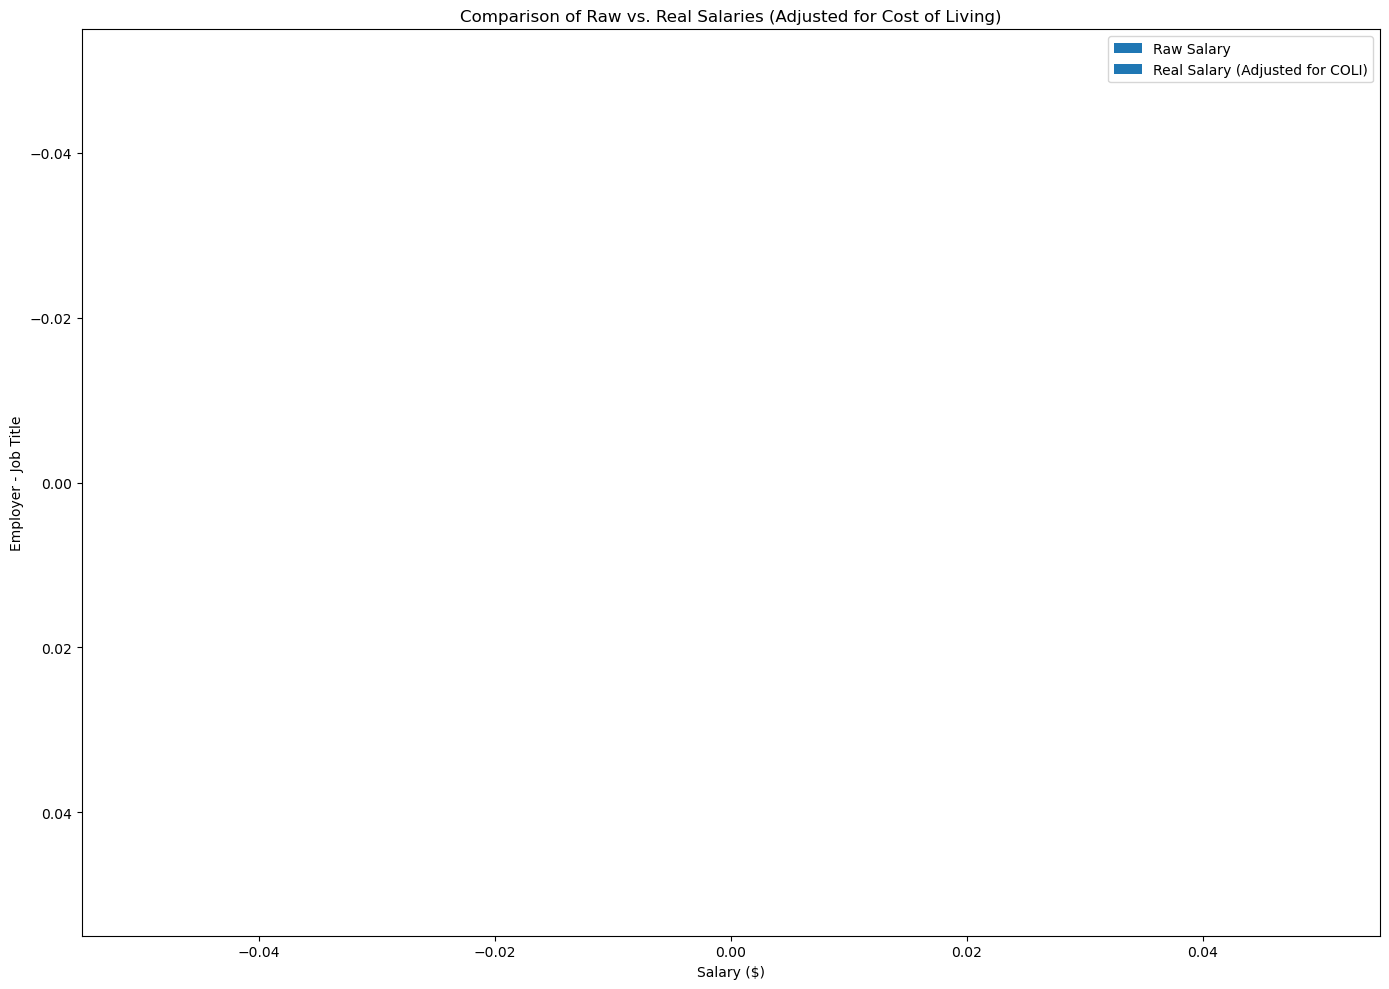

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'
data_df = pd.read_excel(file_path)

# Sample COLI dataset: Replace with actual data if available
cost_of_living_data = {
    'CALIFORNIA': 1.5,  # Example: California has 50% higher COLI than average
    'MINNESOTA': 1.2,
    'TEXAS': 1.1,
    'NEW YORK': 1.8,
    'OREGON': 1.3
}

# Filter for the job sub-types of interest
job_sub_types = [
    "Technical Data Analyst",
    "Senior Data Scientist",
    "Chief Data Scientist, Senior Risk Manager",
    "Senior Software Engineer/ Architect - Big Data Pla",
    "Senior Data Scientist",
    "Chief Data Scientist",
    "Senior Healthcare Data Scientist",
    "Senior Product Manager - Data Scientist",
    "Data Scientist",
    "Data Analyst",
    "Senior Data Analyst",
    "Senior Software Engineer, Data Analysis & Infrastr",
    "Spatial Data Management Consultant",
    "Lead Data Scientist"
]

# Filter the data
filtered_jobs = data_df[data_df['JOB_TITLE'].isin(job_sub_types)].copy()

# Map the COLI to the dataset
filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)

# Drop rows with missing COLI or salary
filtered_jobs = filtered_jobs.dropna(subset=['COLI', 'PAID_WAGE_SUBMITTED'])

# Calculate real salaries (adjusted for COLI)
filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Get the top companies based on raw salaries
top_raw_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['PAID_WAGE_SUBMITTED']
    .max()
    .reset_index()
    .sort_values(by='PAID_WAGE_SUBMITTED', ascending=False)
    .head(10)
)

# Get the top companies based on real salaries (adjusted for COLI)
top_real_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY']
    .max()
    .reset_index()
    .sort_values(by='REAL_SALARY', ascending=False)
    .head(10)
)

# Visualization: Compare Raw vs. Real Salaries
plt.figure(figsize=(14, 10))

# Plot raw salaries
plt.barh(
    top_raw_salaries['EMPLOYER_NAME'] + ' - ' + top_raw_salaries['JOB_TITLE'],
    top_raw_salaries['PAID_WAGE_SUBMITTED'],
    color='skyblue',
    label='Raw Salary'
)

# Plot real salaries
plt.barh(
    top_real_salaries['EMPLOYER_NAME'] + ' - ' + top_real_salaries['JOB_TITLE'],
    top_real_salaries['REAL_SALARY'],
    color='orange',
    alpha=0.7,
    label='Real Salary (Adjusted for COLI)'
)

plt.xlabel('Salary ($)')
plt.ylabel('Employer - Job Title')
plt.title('Comparison of Raw vs. Real Salaries (Adjusted for Cost of Living)')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


Filtered Jobs (First 5 rows):
        CASE_NUMBER        CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
2496  A-14163-77527  certified-expired           7/3/2014     12/1/2014   
2939  A-14282-14609          certified         11/12/2014     4/24/2015   
4633  A-14281-13960          withdrawn         10/14/2014    10/16/2014   
4634  A-14289-16316          certified         10/16/2014     3/16/2015   
5865  A-14209-92931          certified         10/21/2014      4/9/2015   

                                          EMPLOYER_NAME  \
2496                                             QUIXEY   
2939  BAHA INDUSTRIES CORP. DBA OPEN SYSTEMS TECHNOL...   
4633                                     BIRCHBOX, INC.   
4634                                     BIRCHBOX, INC.   
5865                                      STAPLES, INC.   

      PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
2496                   134534.0                           year   
2939                   133723.0 

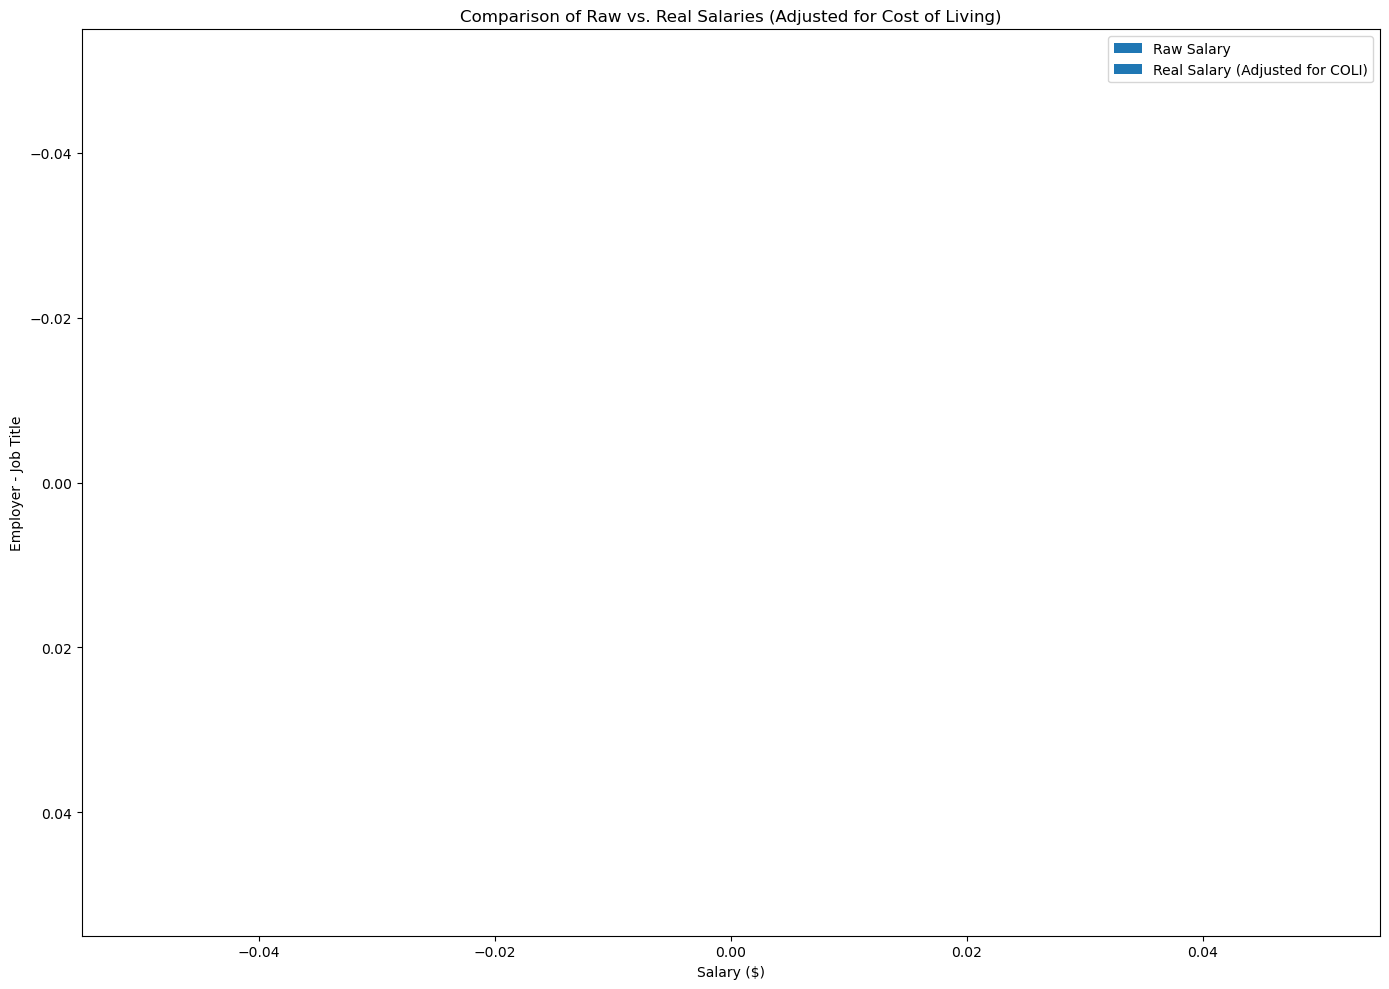

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Temp/01_SFSU/00_Python Group Project/DataDrivers/WIP Users/Raoul_WIP/salary_data_states.xlsx'
data_df = pd.read_excel(file_path)

# Sample COLI dataset: Replace with actual data if available
cost_of_living_data = {
    'CALIFORNIA': 1.5,
    'MINNESOTA': 1.2,
    'TEXAS': 1.1,
    'NEW YORK': 1.8,
    'OREGON': 1.3
}

# Filter for the job sub-types of interest
job_sub_types = [
    "Technical Data Analyst",
    "Senior Data Scientist",
    "Chief Data Scientist, Senior Risk Manager",
    "Senior Software Engineer/ Architect - Big Data Pla",
    "Senior Data Scientist",
    "Chief Data Scientist",
    "Senior Healthcare Data Scientist",
    "Senior Product Manager - Data Scientist",
    "Data Scientist",
    "Data Analyst",
    "Senior Data Analyst",
    "Senior Software Engineer, Data Analysis & Infrastr",
    "Spatial Data Management Consultant",
    "Lead Data Scientist"
]

filtered_jobs = data_df[data_df['JOB_TITLE'].isin(job_sub_types)].copy()

# Debug Step 1: Check the filtered data
print("Filtered Jobs (First 5 rows):")
print(filtered_jobs.head())

# Map the COLI to the dataset
filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)

# Drop rows with missing COLI or salary
filtered_jobs = filtered_jobs.dropna(subset=['COLI', 'PAID_WAGE_SUBMITTED'])

# Debug Step 2: Check after dropping NaN values
print("\nFiltered Jobs After Dropping NaN (First 5 rows):")
print(filtered_jobs.head())

# Calculate real salaries (adjusted for COLI)
filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Debug Step 3: Verify Real Salary Calculation
print("\nFiltered Jobs with Real Salaries (First 5 rows):")
print(filtered_jobs[['EMPLOYER_NAME', 'JOB_TITLE', 'PAID_WAGE_SUBMITTED', 'COLI', 'REAL_SALARY']].head())

# Get the top companies based on raw salaries
top_raw_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['PAID_WAGE_SUBMITTED']
    .max()
    .reset_index()
    .sort_values(by='PAID_WAGE_SUBMITTED', ascending=False)
    .head(10)
)

# Get the top companies based on real salaries (adjusted for COLI)
top_real_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY']
    .max()
    .reset_index()
    .sort_values(by='REAL_SALARY', ascending=False)
    .head(10)
)

# Debug Step 4: Verify Top Salaries
print("\nTop Raw Salaries:")
print(top_raw_salaries)
print("\nTop Real Salaries:")
print(top_real_salaries)

# Visualization: Compare Raw vs. Real Salaries
plt.figure(figsize=(14, 10))

# Plot raw salaries
plt.barh(
    top_raw_salaries['EMPLOYER_NAME'] + ' - ' + top_raw_salaries['JOB_TITLE'],
    top_raw_salaries['PAID_WAGE_SUBMITTED'],
    color='skyblue',
    label='Raw Salary'
)

# Plot real salaries
plt.barh(
    top_real_salaries['EMPLOYER_NAME'] + ' - ' + top_real_salaries['JOB_TITLE'],
    top_real_salaries['REAL_SALARY'],
    color='orange',
    alpha=0.7,
    label='Real Salary (Adjusted for COLI)'
)

plt.xlabel('Salary ($)')
plt.ylabel('Employer - Job Title')
plt.title('Comparison of Raw vs. Real Salaries (Adjusted for Cost of Living)')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()



Filtered Jobs After Dropping NaN (First 5 rows):
Empty DataFrame
Columns: [CASE_NUMBER, CASE_STATUS, CASE_RECEIVED_DATE, DECISION_DATE, EMPLOYER_NAME, PREVAILING_WAGE_SUBMITTED, PREVAILING_WAGE_SUBMITTED_UNIT, PAID_WAGE_SUBMITTED, PAID_WAGE_SUBMITTED_UNIT, JOB_TITLE, WORK_CITY, EDUCATION_LEVEL_REQUIRED, COLLEGE_MAJOR_REQUIRED, EXPERIENCE_REQUIRED_Y_N, EXPERIENCE_REQUIRED_NUM_MONTHS, COUNTRY_OF_CITIZENSHIP, PREVAILING_WAGE_SOC_CODE, PREVAILING_WAGE_SOC_TITLE, WORK_STATE, WORK_STATE_ABBREVIATION, WORK_POSTAL_CODE, FULL_TIME_POSITION_Y_N, VISA_CLASS, PREVAILING_WAGE_PER_YEAR, PAID_WAGE_PER_YEAR, JOB_TITLE_SUBGROUP, order, COLI, REAL_SALARY]
Index: []

[0 rows x 29 columns]

Filtered Jobs with Real Salaries (First 5 rows):
Empty DataFrame
Columns: [EMPLOYER_NAME, JOB_TITLE, PAID_WAGE_SUBMITTED, COLI, REAL_SALARY]
Index: []

Top Raw Salaries:
Empty DataFrame
Columns: [EMPLOYER_NAME, JOB_TITLE, PAID_WAGE_SUBMITTED]
Index: []

Top Real Salaries:
Empty DataFrame
Columns: [EMPLOYER_NAME, JOB_T

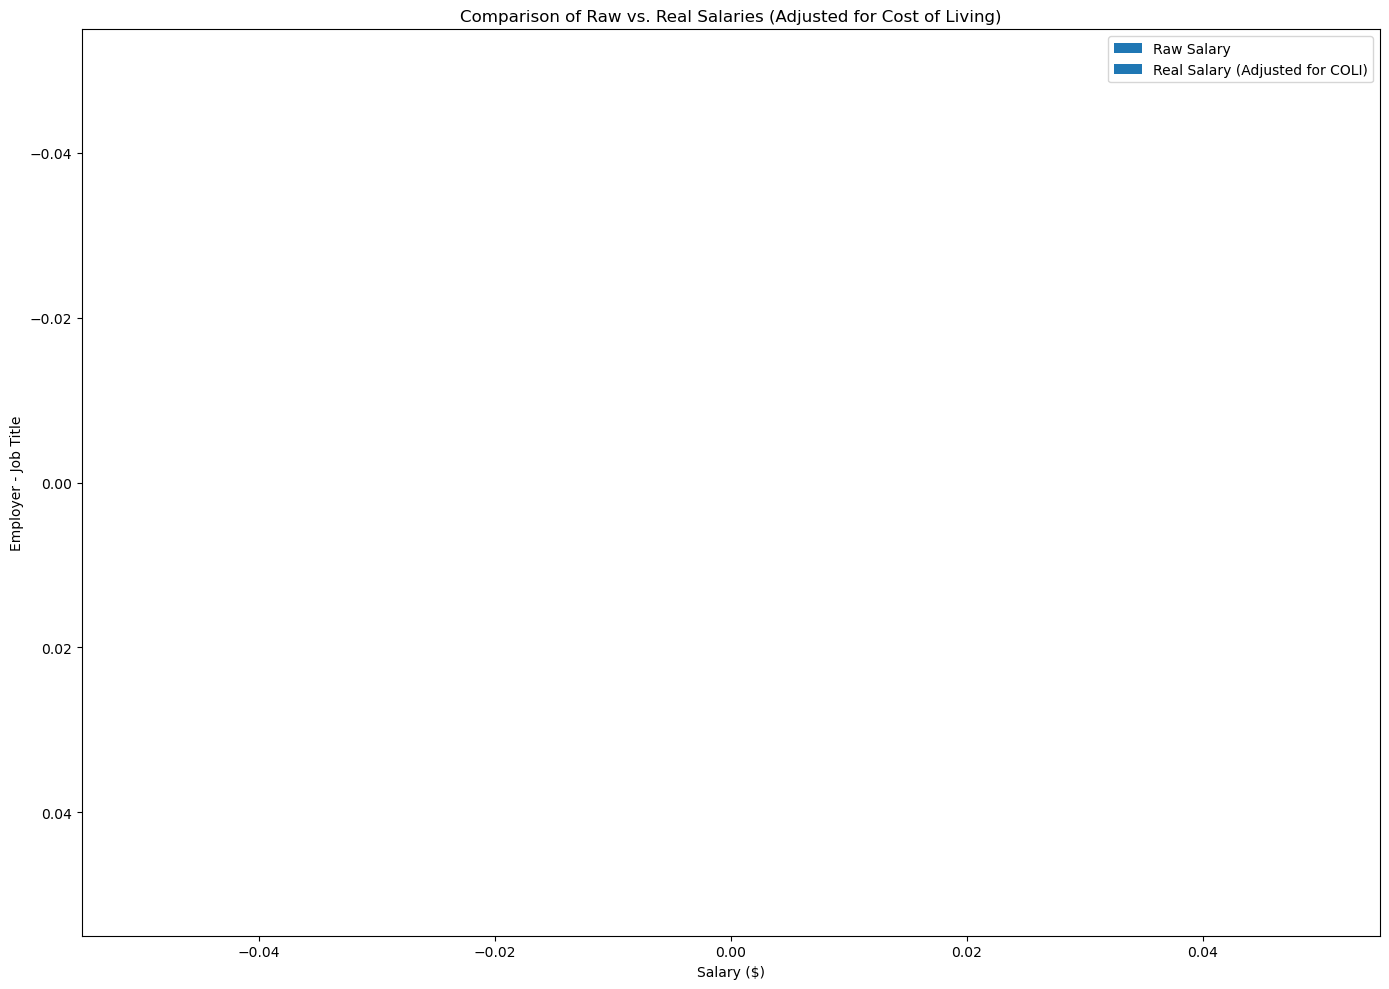

In [25]:
# Map the COLI to the dataset
filtered_jobs['COLI'] = filtered_jobs['WORK_STATE'].map(cost_of_living_data)

# Drop rows with missing COLI or salary
filtered_jobs = filtered_jobs.dropna(subset=['COLI', 'PAID_WAGE_SUBMITTED'])

# Debug Step 2: Check after dropping NaN values
print("\nFiltered Jobs After Dropping NaN (First 5 rows):")
print(filtered_jobs.head())

# Calculate real salaries (adjusted for COLI)
filtered_jobs['REAL_SALARY'] = filtered_jobs['PAID_WAGE_SUBMITTED'] / filtered_jobs['COLI']

# Debug Step 3: Verify Real Salary Calculation
print("\nFiltered Jobs with Real Salaries (First 5 rows):")
print(filtered_jobs[['EMPLOYER_NAME', 'JOB_TITLE', 'PAID_WAGE_SUBMITTED', 'COLI', 'REAL_SALARY']].head())

# Get the top companies based on raw salaries
top_raw_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['PAID_WAGE_SUBMITTED']
    .max()
    .reset_index()
    .sort_values(by='PAID_WAGE_SUBMITTED', ascending=False)
    .head(10)
)

# Get the top companies based on real salaries (adjusted for COLI)
top_real_salaries = (
    filtered_jobs.groupby(['EMPLOYER_NAME', 'JOB_TITLE'])['REAL_SALARY']
    .max()
    .reset_index()
    .sort_values(by='REAL_SALARY', ascending=False)
    .head(10)
)

# Debug Step 4: Verify Top Salaries
print("\nTop Raw Salaries:")
print(top_raw_salaries)
print("\nTop Real Salaries:")
print(top_real_salaries)

# Visualization: Compare Raw vs. Real Salaries
plt.figure(figsize=(14, 10))

# Plot raw salaries
plt.barh(
    top_raw_salaries['EMPLOYER_NAME'] + ' - ' + top_raw_salaries['JOB_TITLE'],
    top_raw_salaries['PAID_WAGE_SUBMITTED'],
    color='skyblue',
    label='Raw Salary'
)

# Plot real salaries
plt.barh(
    top_real_salaries['EMPLOYER_NAME'] + ' - ' + top_real_salaries['JOB_TITLE'],
    top_real_salaries['REAL_SALARY'],
    color='orange',
    alpha=0.7,
    label='Real Salary (Adjusted for COLI)'
)

plt.xlabel('Salary ($)')
plt.ylabel('Employer - Job Title')
plt.title('Comparison of Raw vs. Real Salaries (Adjusted for Cost of Living)')
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
